# Forecast onion price by Time series models

# Data

This dataset is about indian onion market.

# Attribute Information

1. Maket Name
2. Month
3. Year
4. quantity
5. priceMin
6. priceMax
7. pricemod
8. state 
9. city
10. date


# Problem Statement

Forecast onion price for Mumbai market

# Importing Libraries

In [131]:
# Import the library we need, which is Pandas and Matplotlib
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Import statsmodel
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.tsa.stattools import adfuller

# Data Preprocessing

In [132]:
# Set some parameters to get good visuals - style to ggplot and size to 15,10
plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (15, 10)

In [133]:
# Read the csv file of Monthwise Quantity and Price csv file we have.
df_market = pd.read_csv('MonthWiseMarketArrivals_Clean.csv')

In [134]:
# Changing the date column to a Time Interval columnn
df_market.date = pd.DatetimeIndex(df_market.date)

In [135]:
# Change the index to the date column
df_market.index = pd.PeriodIndex(df_market.date, freq='M')

In [136]:
# Sort the data frame by date
df_market = df_market.sort_values(by = "date")

In [137]:
df_market.head()

,market,month,year,quantity,priceMin,priceMax,priceMod,state,city,date
date,,,,,,,,,,
1996-01,LASALGAON(MS),January,1996,225063,160,257,226,MS,LASALGAON,1996-01-01
1996-02,LASALGAON(MS),February,1996,196164,133,229,186,MS,LASALGAON,1996-02-01
1996-03,LASALGAON(MS),March,1996,178992,155,274,243,MS,LASALGAON,1996-03-01
1996-04,LASALGAON(MS),April,1996,192592,136,279,254,MS,LASALGAON,1996-04-01
1996-05,LASALGAON(MS),May,1996,237574,154,312,269,MS,LASALGAON,1996-05-01


# Get the priceMod for Mumbai Market

In [138]:
dfMumbai = df_market.loc[df_market.city == "MUMBAI"].copy()

In [139]:
dfMumbai.head()

,market,month,year,quantity,priceMin,priceMax,priceMod,state,city,date
date,,,,,,,,,,
2004-01,MUMBAI,January,2004,267100,719,971,849,MS,MUMBAI,2004-01-01
2004-02,MUMBAI,February,2004,239350,614,834,736,MS,MUMBAI,2004-02-01
2004-03,MUMBAI,March,2004,238000,436,557,498,MS,MUMBAI,2004-03-01
2004-04,MUMBAI,April,2004,198200,346,475,397,MS,MUMBAI,2004-04-01
2004-05,MUMBAI,May,2004,166430,357,466,405,MS,MUMBAI,2004-05-01


In [140]:
# Drop redundant columns
dfMumbai = dfMumbai.drop(["market", "month", "year", "state", "city", "priceMin", "priceMax"], axis = 1)

In [141]:
dfMumbai.head()

,quantity,priceMod,date
date,,,
2004-01,267100,849,2004-01-01
2004-02,239350,736,2004-02-01
2004-03,238000,498,2004-03-01
2004-04,198200,397,2004-04-01
2004-05,166430,405,2004-05-01


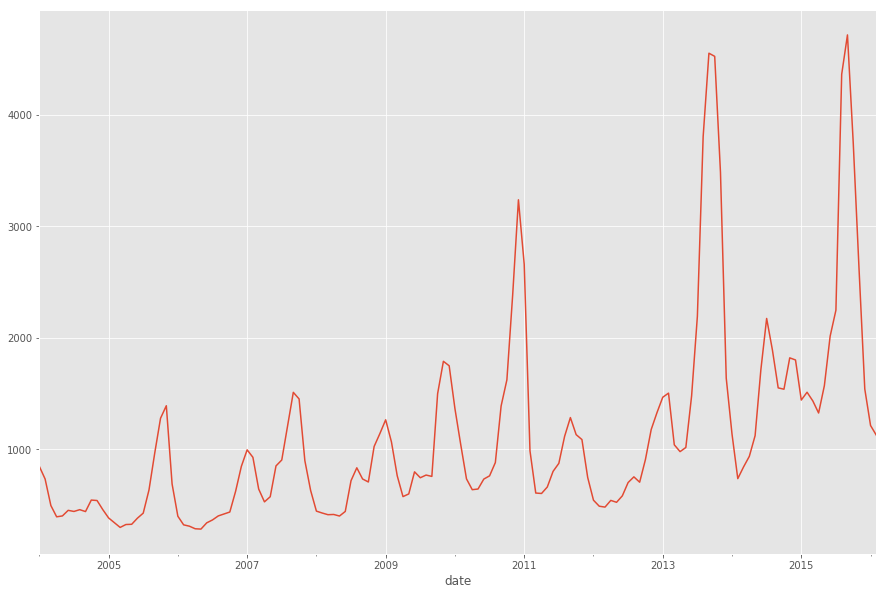

In [142]:
#plot pricemod for mumbai market
dfMumbai.priceMod.plot()

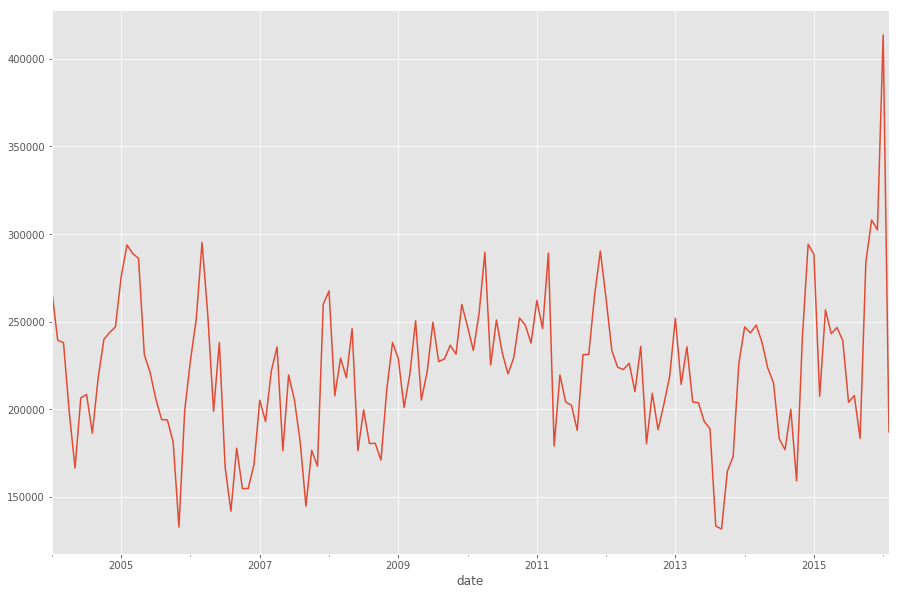

In [143]:
#plot quantity for mumbai market
dfMumbai.quantity.plot()

#  Transformation - Log

Transformations such as logarithms can help to stabilize the variance of a time series. 


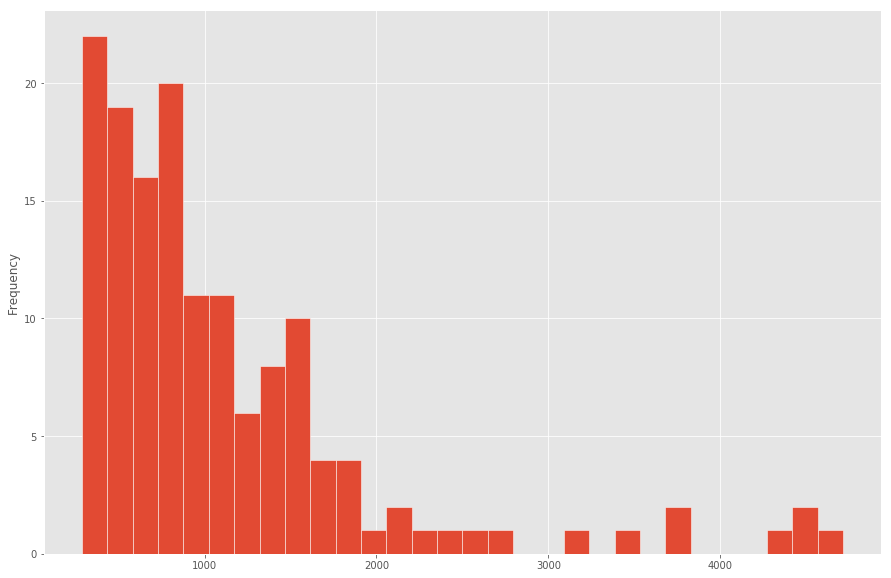

In [144]:
#create histogram to visualize priceMod column
dfMumbai.priceMod.plot(kind = "hist", bins = 30,edgecolor = 'white')

In [145]:
#calculate logarithms value for priceMod column and store that value to new column
dfMumbai['priceModLog'] = np.log(dfMumbai.priceMod)
dfMumbai.head()

,quantity,priceMod,date,priceModLog
date,,,,
2004-01,267100,849,2004-01-01,6.744059
2004-02,239350,736,2004-02-01,6.601230
2004-03,238000,498,2004-03-01,6.210600
2004-04,198200,397,2004-04-01,5.983936
2004-05,166430,405,2004-05-01,6.003887


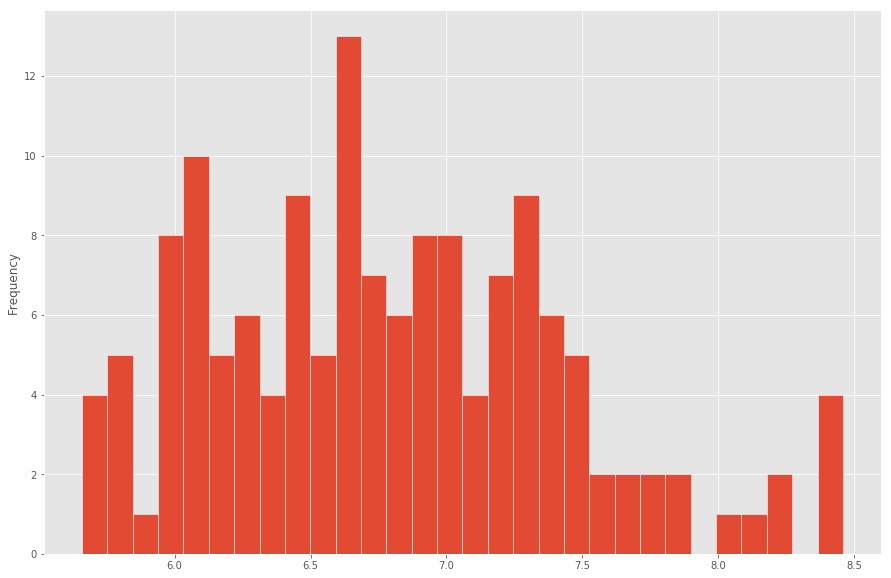

In [146]:
#create histogram to visualize priceModLog
dfMumbai.priceModLog.plot(kind = "hist", bins = 30,edgecolor = 'white')

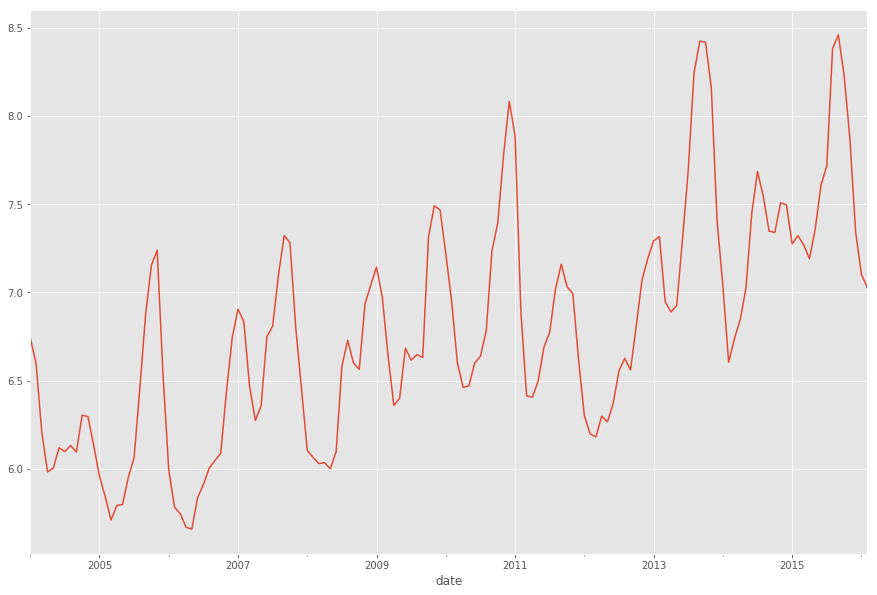

In [147]:
#plot the priceModlog value
dfMumbai.priceModLog.plot()

## Basic Time Series Model

## Mean  Model

This very simple forecasting model will be called the "mean model"

In [151]:
model_mean_pred = dfMumbai.priceModLog.mean()

In [152]:
# Let us store this as our Mean Predication Value
dfMumbai["priceMean"] = np.exp(model_mean_pred)

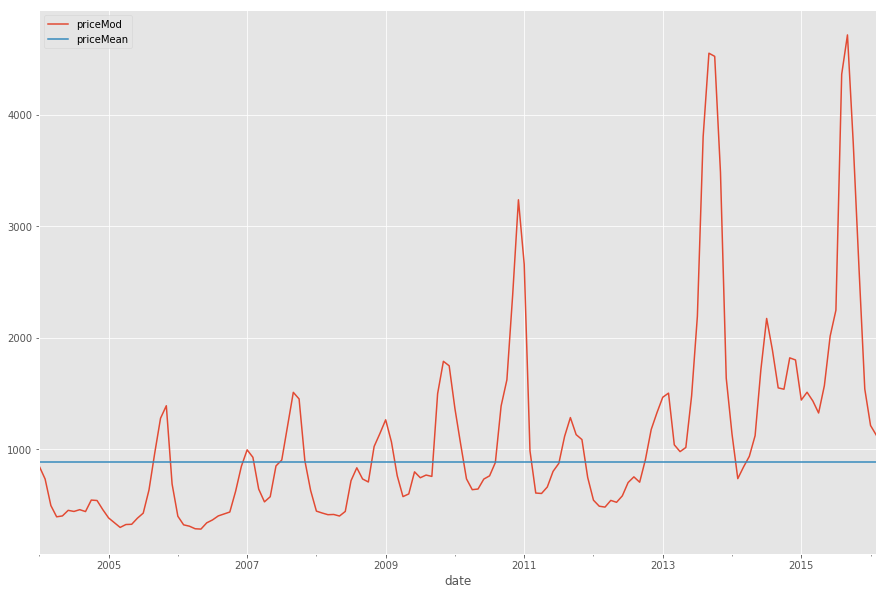

In [153]:
dfMumbai.plot(kind="line", x="date", y = ["priceMod", "priceMean"])

In [154]:
#this fuction calculates root mean square error
def RMSE(predicted, actual):
    mse = (predicted - actual)**2
    rmse = np.sqrt(mse.sum()/mse.count())
    return rmse

In [155]:
#call RMSE fuction to calculate RMSE value
model_mean_RMSE = RMSE(dfMumbai.priceMean, dfMumbai.priceMod)
model_mean_RMSE

908.4772843986451

# Naive Approach

In [156]:
#train and test data set
X_Train = dfMumbai.loc['2004-01':'2013-12']
X_Test = dfMumbai.loc['2014-01':'2016-02']
X_Test_Pred = X_Test

In [157]:
# convert pricemodlog to numpy array
X_Train_priceModLog = np.asarray(X_Train['priceModLog'])

In [158]:
# create new column and save last value of pricemodlog column to the new column
X_Test_Pred['Naive'] = X_Train_priceModLog[len(X_Train_priceModLog)-1]

/home/algoritmo/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


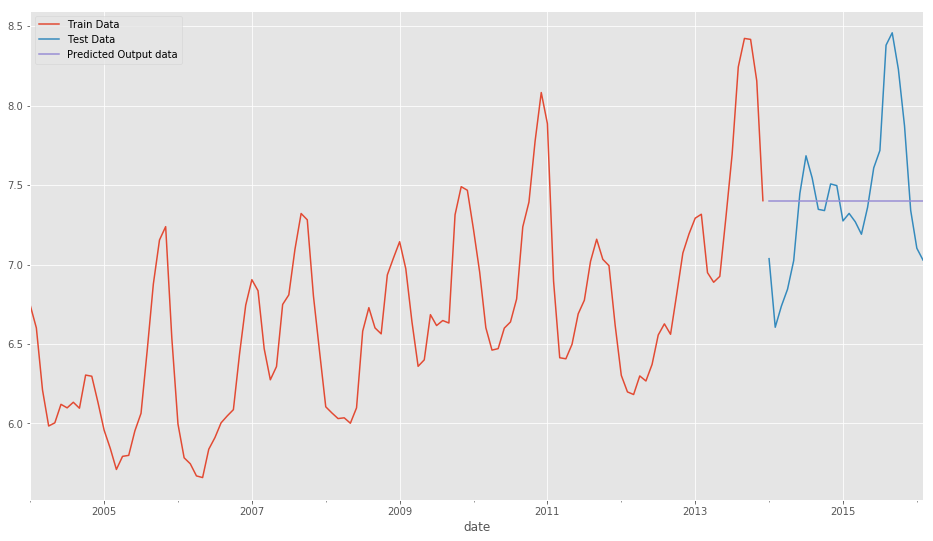

In [159]:
#plot train data
X_Train.priceModLog.plot(figsize=(16,9),label='Train Data')
#plot test data
X_Test.priceModLog.plot(figsize=(16,9),label='Test Data')
# plot prediction data
X_Test_Pred.Naive.plot(figsize=(16,9),label='Predicted Output data')
#print legend
plt.legend()

# Evaluation

In [160]:
#import mean_squared_error from sklearn
from sklearn.metrics import mean_squared_error
#import sqrt from math module
from math import sqrt
#calculate RMSE value
print (sqrt(mean_squared_error(X_Test['priceModLog'],X_Test_Pred['Naive'])))

0.4485417321685715


## Simple Moving Average 

In [161]:
# For smoothing the values we can use 12 month Moving Averages 
dfMumbai['priceModLogMA12'] = dfMumbai.priceModLog.rolling(window=12,center=False).mean()

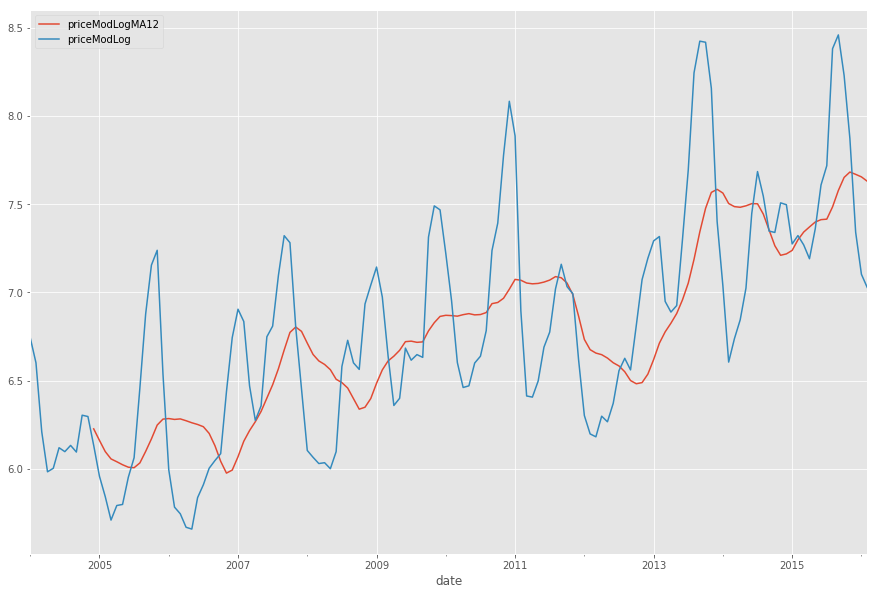

In [162]:
dfMumbai.plot(kind ="line", y=["priceModLogMA12", "priceModLog"])

The SMA model assumes that there is no trend in the data. The forecasts from the SMA model are equal to a weighted average of recent values.

    

In [167]:
dfMumbai["priceMA12"] = np.exp(dfMumbai.priceModLogMA12)
dfMumbai.tail()

,quantity,priceMod,date,priceModLog,priceMean,priceModLogMA12,priceMA12
date,,,,,,,
2015-10,284078,3748,2015-10-01,8.228978,889.100239,7.651143,2103.048702
2015-11,308071,2623,2015-11-01,7.872074,889.100239,7.681554,2167.987092
2015-12,302409,1542,2015-12-01,7.340836,889.100239,7.668570,2140.018320
2016-01,413681,1215,2016-01-01,7.102499,889.100239,7.654238,2109.566985
2016-02,187100,1128,2016-02-01,7.028201,889.100239,7.629767,2058.570924


In [168]:
# Root Mean Squared Error (RMSE)
model_MA12_RMSE = RMSE(dfMumbai.priceMA12, dfMumbai.priceMod)
model_MA12_RMSE

726.3166154178524

#  Time Series Decomposition

We can also decompose the time series into trend and seasonality

In [170]:
#import seasonal decompose module
from statsmodels.tsa.seasonal import seasonal_decompose

In [171]:
#convert index to datetime format
dfMumbai.index = dfMumbai.index.to_datetime()

/home/algoritmo/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:2: FutureWarning: to_datetime is deprecated. Use self.to_timestamp(...)
  


In [172]:
# decompose priceModLog column
decomposition = seasonal_decompose(dfMumbai.priceModLog, model = "additive")

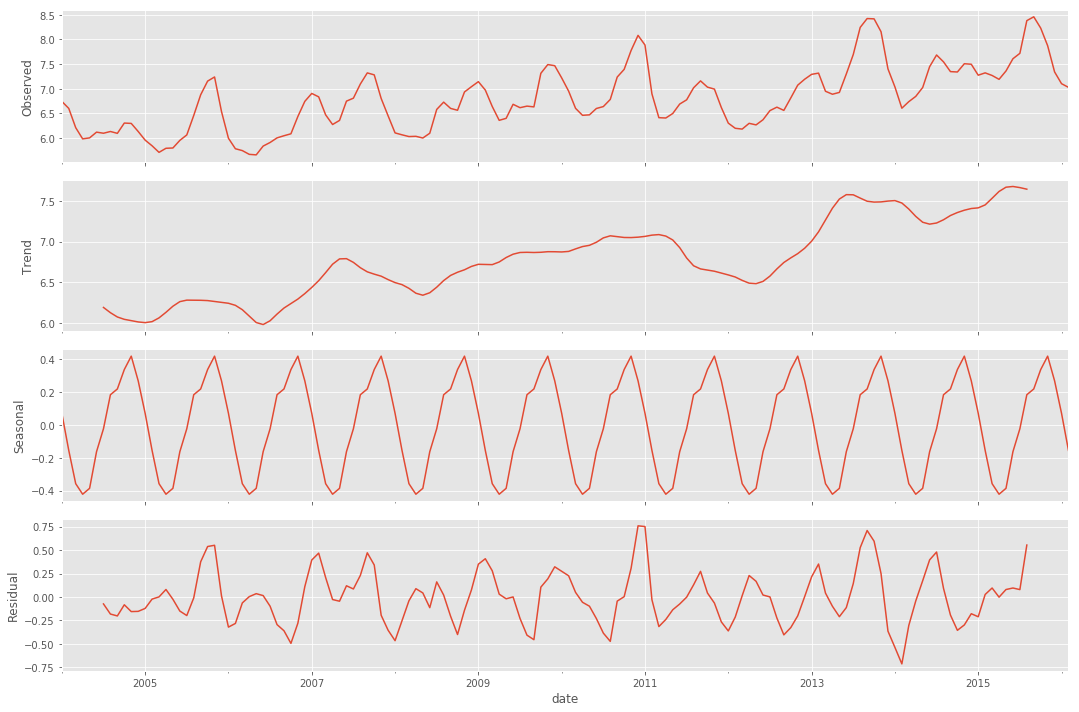

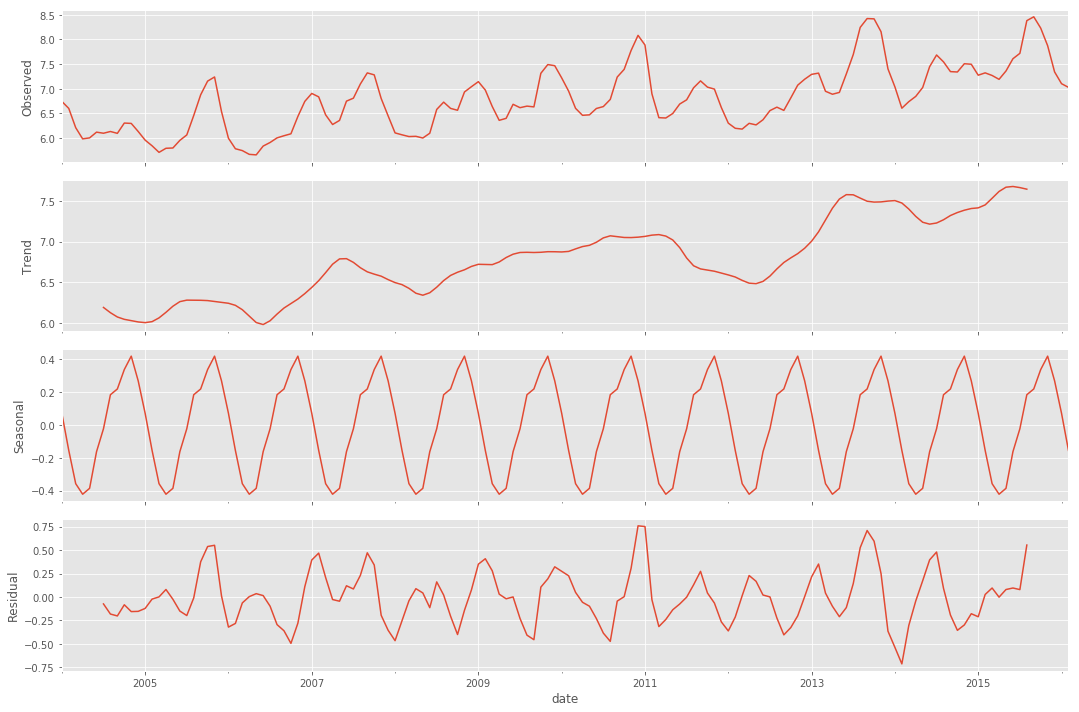

In [173]:
decomposition.plot()

In [174]:
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

In [175]:
dfMumbai["priceDecomp"] = np.exp(trend + seasonal)

In [176]:
# Root Mean Squared Error (RMSE)
model_Decomp_RMSE = RMSE(dfMumbai.priceDecomp, dfMumbai.priceMod)
model_Decomp_RMSE

476.40419952320724

# ACF and PACF Plots

# ACF Plots

In [177]:
#ACF and PACF plots:
from statsmodels.tsa.stattools import acf, pacf

In [178]:
# compute acf values
lag_acf = acf(dfMumbai.priceModLog, nlags=20)

In [180]:
# store acf values in pandas series
ACF = pd.Series(lag_acf)

In [181]:
ACF

0     1.000000
1     0.916427
2     0.743062
3     0.550828
4     0.392470
5     0.289267
6     0.249525
7     0.265340
8     0.317037
9     0.378932
10    0.423417
11    0.434913
12    0.408850
13    0.367422
14    0.313430
15    0.244292
16    0.166225
17    0.111812
18    0.090948
19    0.114595
20    0.175829
dtype: float64

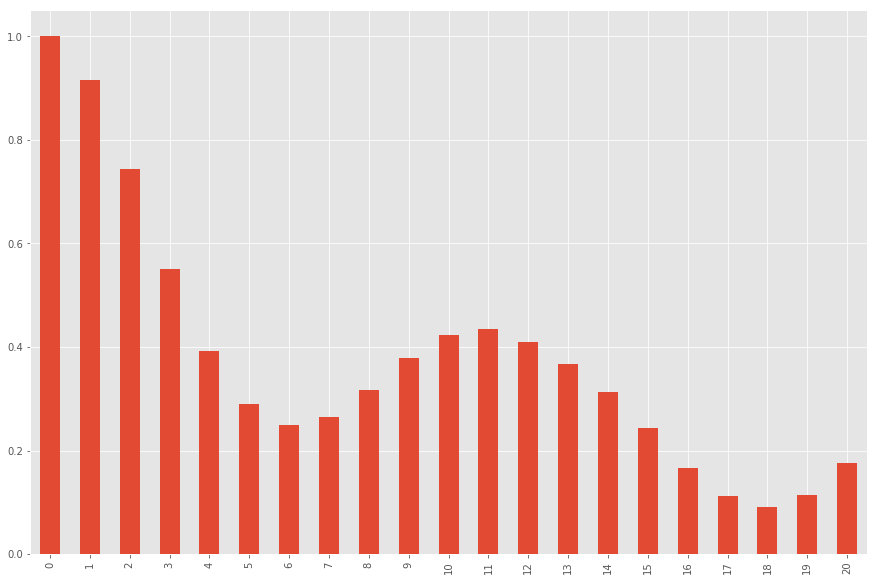

In [182]:
# plot acf values
ACF.plot(kind = "bar")

# PACF Plots

In [184]:
#compute pacf values
lag_pacf = pacf(dfMumbai.priceModLog, nlags=20, method='ols')

In [185]:
# store pacf values to pandas series
PACF = pd.Series(lag_pacf)

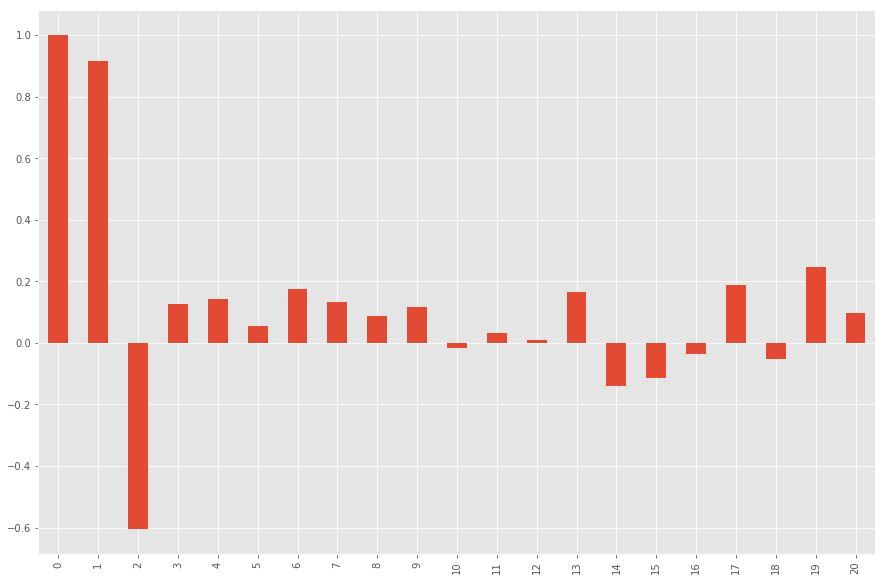

In [186]:
PACF.plot(kind = "bar")

# ARIMA Model 

In [189]:
#import arima module
from statsmodels.tsa.arima_model import ARIMA

In [190]:
# print priceModLog 
dfMumbai.priceModLog.head()

date
2004-01-01    6.744059
2004-02-01    6.601230
2004-03-01    6.210600
2004-04-01    5.983936
2004-05-01    6.003887
Freq: MS, Name: priceModLog, dtype: float64

In [191]:
# Running the ARIMA Model(1,0,1)
model_AR1MA = ARIMA(dfMumbai.priceModLog, order=(1,0,1))

In [192]:
# fit the arima model
results_ARIMA = model_AR1MA.fit(disp = -1)

In [125]:
# view fittedvalues
results_ARIMA.fittedvalues.head()

/home/algoritmo/anaconda/lib/python3.6/site-packages/statsmodels/tsa/kalmanf/kalmanfilter.py:577: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if issubdtype(paramsdtype, float):


date
2004-01-01    6.796924
2004-02-01    6.748066
2004-03-01    6.566311
2004-04-01    6.114778
2004-05-01    6.028102
Freq: MS, dtype: float64

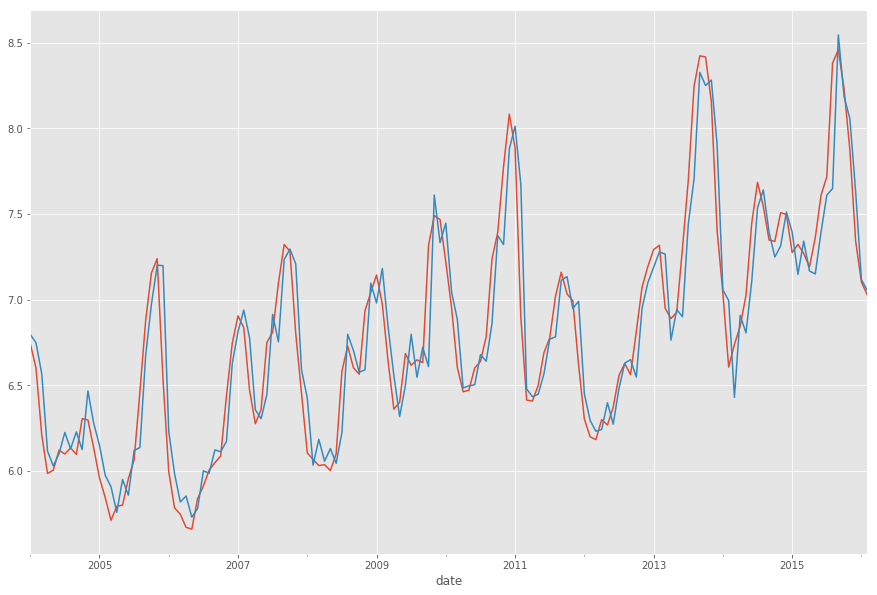

In [193]:
#plot arima fittedvalues
dfMumbai.priceModLog.plot()
results_ARIMA.fittedvalues.plot()

In [194]:
dfMumbai.priceModLog.sum()

991.3706576498935

In [195]:
predictions_ARIMA_diff = pd.Series(results_ARIMA.fittedvalues, copy=True)
predictions_ARIMA_diff.tail()

date
2015-10-01    8.185113
2015-11-01    8.055480
2015-12-01    7.628999
2016-01-01    7.115978
2016-02-01    7.053568
Freq: MS, dtype: float64

In [196]:
predictions_ARIMA_diff.sum()

991.3689997174625

In [197]:
# caliculate cumulative sum values
predictions_ARIMA_diff_cumsum = predictions_ARIMA_diff.cumsum()
predictions_ARIMA_diff_cumsum.tail()

date
2015-10-01    961.514975
2015-11-01    969.570454
2015-12-01    977.199454
2016-01-01    984.315432
2016-02-01    991.369000
Freq: MS, dtype: float64

In [198]:
#create series priceModlog first value 
predictions_ARIMA_log = pd.Series(dfMumbai.priceModLog.iloc[0], index=dfMumbai.priceModLog.index)
#add preicemodlog first value with prediction cumulative sum
predictions_ARIMA_log = predictions_ARIMA_log.add(predictions_ARIMA_diff_cumsum,fill_value=0)
predictions_ARIMA_log.tail()

date
2015-10-01    968.259034
2015-11-01    976.314513
2015-12-01    983.943513
2016-01-01    991.059491
2016-02-01    998.113059
Freq: MS, dtype: float64

In [199]:
dfMumbai['priceARIMA'] = np.exp(predictions_ARIMA_log)

/home/algoritmo/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:1: RuntimeWarning: overflow encountered in exp
  """Entry point for launching an IPython kernel.


# Simple Exponential Smoothing

/home/algoritmo/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


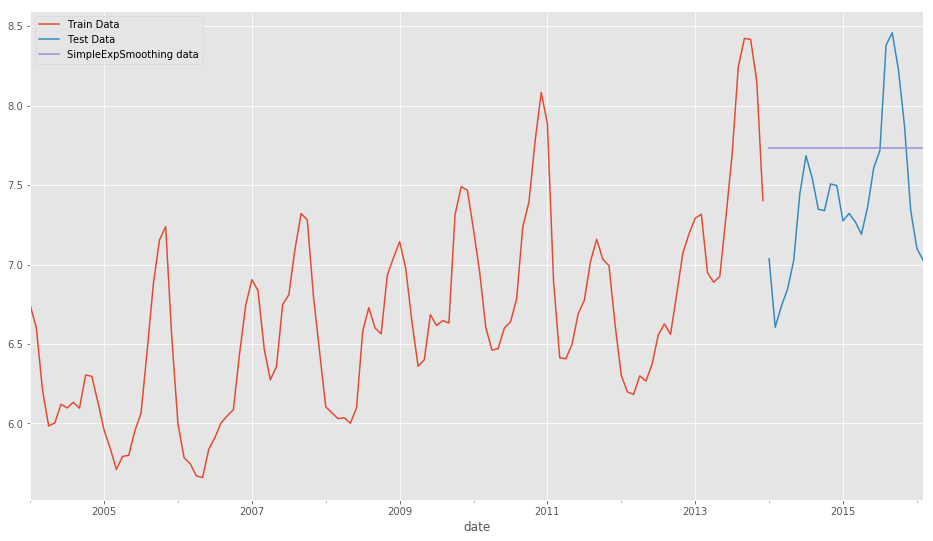

In [79]:
# import libraries
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt

# create simpleexpsmoothing object and fit the model
simple_exp = SimpleExpSmoothing(X_Train_priceModLog).fit(smoothing_level = 0.6)

# forest X_Test_Pred and store result to SimpleExpSmoothing
X_Test_Pred['SimpleExpSmoothing'] = simple_exp.forecast(len(X_Test_Pred))

# plot train data
X_Train.priceModLog.plot(figsize=(16,9),label='Train Data')

# plot test data
X_Test.priceModLog.plot(figsize=(16,9),label='Test Data')

#plot forest data
X_Test_Pred.SimpleExpSmoothing.plot(figsize=(16,9),label='SimpleExpSmoothing data')
plt.legend()

# Evaluation

In [78]:
#calculate RMSE Value
print (sqrt(mean_squared_error(X_Test['priceModLog'],X_Test_Pred['SimpleExpSmoothing'])))

0.5502268071681311


# Holt's Linear Model - Include Trend Also (Holt)

/home/algoritmo/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


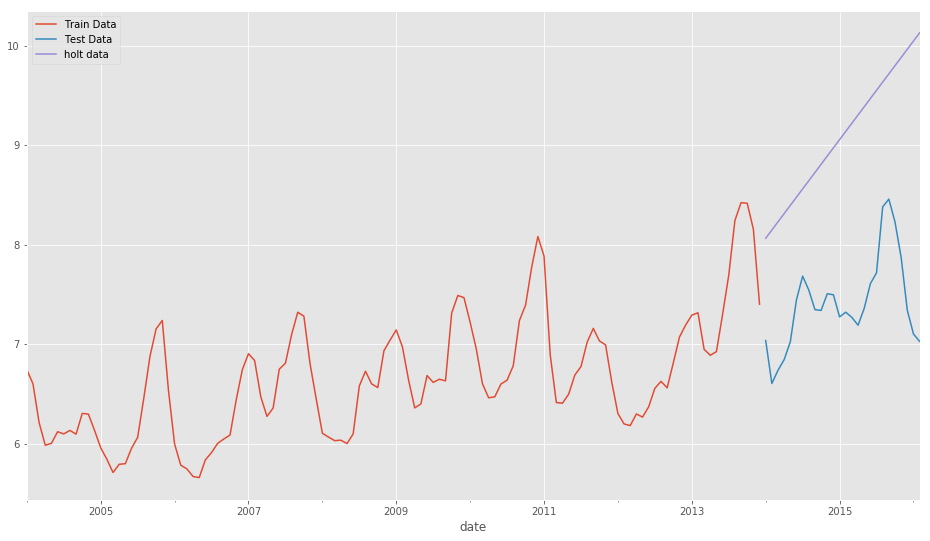

In [86]:
# create Holt model and fit on data
holt = Holt(X_Train_priceModLog).fit(smoothing_level=0.2, smoothing_slope=0.1)

# predictions
X_Test_Pred['holt'] = holt.forecast(len(X_Test_Pred))

# plot train data
X_Train.priceModLog.plot(figsize=(16,9),label='Train Data')

# plot test data
X_Test.priceModLog.plot(figsize=(16,9),label='Test Data')

# plot predictions value
X_Test_Pred.holt.plot(figsize=(16,9),label='holt data')
plt.legend()

# Evaluation

In [87]:
#calculate RMSE Value
print (sqrt(mean_squared_error(X_Test['priceModLog'],X_Test_Pred['holt'])))

1.7697408564734538


# Holt's Winter Model - includes Trend and Season(Exponential Smoothing)

/home/algoritmo/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


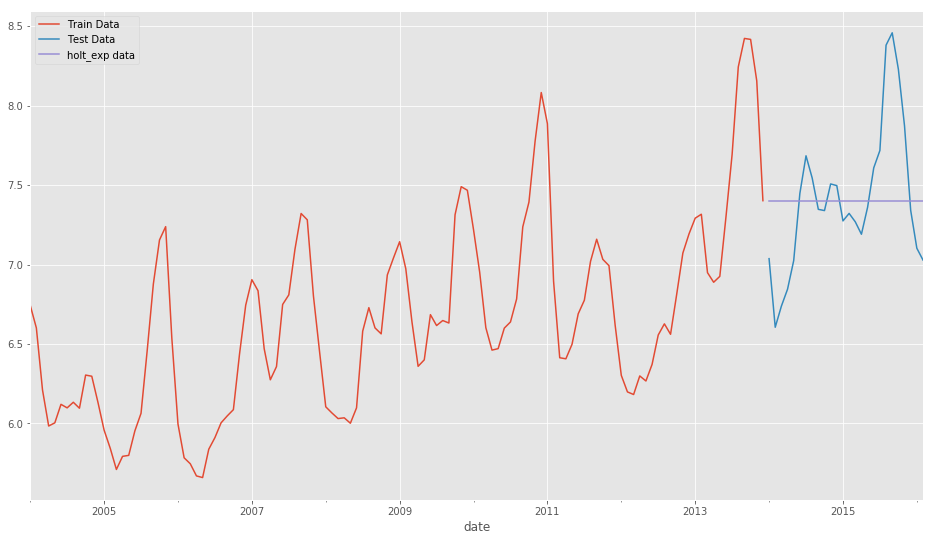

In [92]:
# create exponential smoothing
holt_exp = ExponentialSmoothing(X_Train_priceModLog).fit()

# predictions
X_Test_Pred['holt_exp'] = holt_exp.forecast(len(X_Test_Pred))

# plot train data
X_Train.priceModLog.plot(figsize=(16,9),label='Train Data')

# plot test data
X_Test.priceModLog.plot(figsize=(16,9),label='Test Data')

# plot forecast data
X_Test_Pred.holt_exp.plot(figsize=(16,9),label='holt_exp data')
plt.legend()

# Evaluation

In [97]:
#calculate RMSE Value
print (sqrt(mean_squared_error(X_Test['priceModLog'],X_Test_Pred['holt_exp'])))

0.4485417321685715
